In [41]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time

class CSensor(object):
    def __init__(self,name,x = 0, y = 0):
        self.name = name
        self.x_base = x
        self.y_base = y
        self.heading =math.pi - math.atan2(self.x_base,self.y_base)        
    def set_price(self,price = 1):
        self.price = price
    def __str__(self,print_all = False):
        if print_all :
            return " ".join(str(items) for items in (self.__dict__.items()))
        else:
            return self.name
        
class CMate(CSensor):
    def __init__(self,name,x = 0, y = 0,width = 1,length = 1):
        super(CMate,self).__init__(name,x,y)
        self.width = width
        self.length = length
        self._calc_contour()
    def _calc_contour(self):
        self.mate_x = []
        self.mate_y = []
        
        self.mate_x.append(self.length/2)
        self.mate_y.append(self.width/2)
        
        self.mate_x.append(self.length/2)
        self.mate_y.append(-self.width/2)
        
        self.mate_x.append(-self.length/2)
        self.mate_y.append(-self.width/2)
        
        self.mate_x.append(-self.length/2)
        self.mate_y.append(self.width/2)
        
        self.mate_x.append(self.length/2)
        self.mate_y.append(self.width/2)
        
        self.__mate_x,self.__mate_y = self._interpolate(self.mate_x,self.mate_y)
    
    def _interpolate(self,x,y):
        rx,ry = [],[]
        dtheta = 0.05
        for i in range(len(x) - 1):
            rx.extend([(1.0 - θ) * x[i] + θ * x[i + 1] # interpolate the edges
                       for θ in np.arange(0.0, 1.0, dtheta)])
            ry.extend([(1.0 - θ) * y[i] + θ * y[i + 1]
                       for θ in np.arange(0.0, 1.0, dtheta)])            
        return rx, ry
    
    def calc_global_contour(self):
        gx = [(ix * np.cos(self.heading) + iy * np.sin(self.heading)) +
              self.x_base for (ix, iy) in zip(self.__mate_x, self.__mate_y)]
        gy = [(ix * np.sin(self.heading) - iy * np.cos(self.heading)) +
              self.y_base for (ix, iy) in zip(self.__mate_x, self.__mate_y)]
        return gx, gy
    
    def plot(self,fig):
        fig.plot(self.x_base,self.y_base,".b")
        gx,gy = self.calc_global_contour()
        plt.plot(gx,gy,"--b")
        
class CFence(CMate):
        def plot(self,fig):
            fig.plot(self.x_base,self.y_base,".y")
            gx,gy = self.calc_global_contour()
            plt.plot(gx,gy,"--y")

class CLidar(CSensor):
    def __init__(self,name,x = 0, y = 0,lidar_range = 5.5,angle_res = 1,min_angle = -math.pi/2, max_angle = math.pi/2):
        super(CLidar,self).__init__(name,x,y)
        self.Lrange = lidar_range
        self.angle_res = angle_res
        self.min_angle = min_angle
        self.max_angle = max_angle
    # TODO:Check whether a point is inside of a rectangle：https://blog.csdn.net/qq_34342154/article/details/78257827
    def object_detection(self,human,angle_res):
        x,y,angle,r = [],[],[],[]
        
    def plot(self,fig):
        fig.plot(self.x_base,self.y_base,".g")

class CRobot(object):
    def __init__(self,start_vel = 1, start_pos = 0):
        self.x_base = 0
        self.y_base = 0
        self.vel = start_vel
        self.pos = start_pos - math.pi/2
        self.range = 5.5
        self.eef_x = self.range * math.sin(self.pos)
        self.eef_y = self.range * math.cos(self.pos)
    def update(self):
        self.pos -= self.vel
        self.eef_x = self.range * math.sin(self.pos)
        self.eef_y = self.range * math.cos(self.pos)
    def plot(self,fig):
        fig.plot(self.x_base,self.y_base,"sr")
        fig.plot([self.x_base,self.y_base],[self.eef_x,self.eef_y],"-r")

In [42]:
mate = CMate('Mate1',x = -1, y = 5,width=4,length=6)
fence = CFence('Fence1', x = -2, y=-6, width = 0.5,length = 4)
lidar = CLidar('Lidar1',x=2,y=3)
robot = CRobot(start_vel = 0.1,start_pos =0)

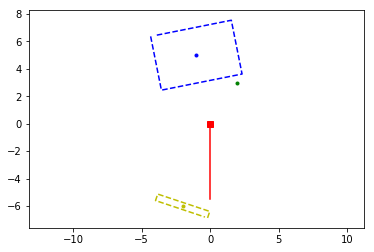

In [43]:
fig,axes = plt.subplots(1,1)
axes.cla()
axes.axis("equal")
mate.plot(axes)
fence.plot(axes)
lidar.plot(axes)
#robot.update()
robot.plot(axes)
time.sleep(0.01)
    
    

In [45]:
robot.eef_x

-4.826704090397049

In [44]:
for i in range(0,5):
    print(robot.eef_x,robot.eef_y)
    robot.update()

-5.5 3.3677786976552215e-16
-5.472522909029141 -0.549083791557555
-5.390366178126829 -1.0926813193728373
-5.254350690190833 -1.6253611366373688
-5.065835467015868 -2.141800882697579
